In [5]:
#IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import mplhep
import numpy as np
import zfit
import zfit.z.numpy as znp
import zfit_physics as zphysics 
from zfit import z  
import tensorflow as tf
import uproot
from matplotlib.gridspec import GridSpec

In [2]:
#DOWLOADING DATASETS

files_simu = [
    './KJpsi_data/simu/2016_MagDown.root',
    './KJpsi_data/simu/2016_MagUp.root',
    # './KJpsi_data/simu/2017_MagDown.root',
    # './KJpsi_data/simu/2017_MagUp.root',
    # './KJpsi_data/simu/2018_MagDown.root',
    # './KJpsi_data/simu/2018_MagUp.root'
]

files_real_data = [
    './KJpsi_data/real/2016_MagDown.root', 
    './KJpsi_data/real/2016_MagUp.root',
    # './KJpsi_data/real/2017_MagDown.root', 
    # './KJpsi_data/real/2017_MagUp.root',
    # './KJpsi_data/real/2018_MagDown.root', 
    # './KJpsi_data/real/2018_MagUp.root'
]
simu_data = uproot.concatenate(files_simu, cut = 'Preselection==1', library='pd')
real_data = uproot.concatenate(files_real_data, cut = 'Preselection==1', library='pd')

# Defining dataset
simu_mass = simu_data['B_JpsiDTF_M']
simu_mass_np = simu_mass.to_numpy()
mass_obs = zfit.Space('mass', limits=(5150, 5400))
simu_data_zfit = zfit.data.Data.from_numpy(array=simu_mass_np, obs=mass_obs)

In [24]:
#FUNCTION FOR PLOTTING
def plot_model_with_pulls(model, name, data, min, max, scale=1, nbins=50, plot_data=True):
    
    size_normal = len(data)
    lower, upper = data.data_range.limit1d
    x = np.linspace(lower, upper, num=1000)

    # Evaluate model PDF
    y = model.pdf(x) * size_normal / nbins * data.data_range.volume
    y *= scale
    fig = plt.figure(figsize=(8, 6))

    gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05) 

    # Upper subplot: Model and Data with error bars
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(x, y, label="model", color="blue", linewidth=1)
    ax1.set_xlim(min, max)

    if plot_data:
        # Bin the data
        data_binned = data.to_binned(nbins)
        bin_centers = data_binned.axes[0].centers
        bin_widths = data_binned.axes[0].widths
        data_counts = data_binned.values()
        data_uncertainties = np.sqrt(data_counts)  # Poisson errors

        ax1.errorbar(
            bin_centers, data_counts, yerr=data_uncertainties, fmt='o', 
            color='orange', label="data", markersize=1, capsize=2
        )

    ax1.legend()
    ax1.set_ylabel("Counts")
    
    ax1.set_title(name)
    ax1.grid()

    # Lower subplot: Pulls visualization
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    if plot_data:
        # Compute pulls
        model_at_bins = model.pdf(bin_centers) * size_normal / nbins * data.data_range.volume
        pulls = (data_counts - model_at_bins) / data_uncertainties

        ax2.errorbar(
            bin_centers, pulls, yerr=1, fmt='o', 
            color='purple', label="pulls", markersize=1, capsize=2
        )
        ax2.axhline(0, color='black', linestyle='--', linewidth=1)
        ax2.set_ylim(-40, 40) 
        ax2.set_ylabel("Pulls")
        ax2.grid()
        ax2.legend()
    # ax1.set_yscale('log')
    ax2.set_xlabel("Observable")
    plt.tight_layout()
    plt.show()

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_3906/2028700416.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


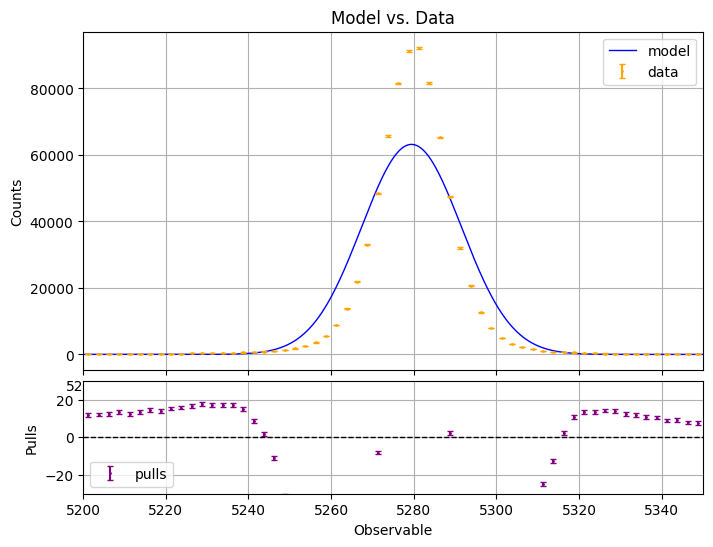

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu_gauss, sigma_gauss]] data=[<zfit.Data: Data obs=('mass',) shape=(765191, 1)>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | opt.) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════╡
│  True   │    True     │      False       │ 5.9e-06 │       2992254.46 |  9992.821 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════╛

Parameters
name           value  (rounded)    at limit
-----------  ------------------  ----------
mu_gauss                5279.44       False
sigma_gauss             12.0797       False


In [ ]:
#GAUSS
# Defining dataset
simu_mass = simu_data['B_JpsiDTF_M']
simu_mass_np = simu_mass.to_numpy()
mass_obs = zfit.Space('mass', limits=(5150, 5400))
simu_data_zfit = zfit.data.Data.from_numpy(array=simu_mass_np, obs=mass_obs)
# Parameters
mu_gauss = zfit.Parameter('mu_gauss', 5279.4, 5279, 5290)
sigma_gauss = zfit.Parameter('sigma_gauss', 12.1, 0.1, 15)

# Define the PDF (gauss profile)
gauss = zfit.pdf.Gauss(obs=mass_obs, mu=mu_gauss, sigma=sigma_gauss)

# Loss function (Unbinned NLL)
nll_gauss = zfit.loss.UnbinnedNLL(model=gauss, data=simu_data_zfit)

# Minimizer
minimizer_minuit = zfit.minimize.Minuit()
result_gauss = minimizer_minuit.minimize(loss=nll_gauss)

# Plot result
plot_model_with_pulls(gauss, "gauss", simu_data_zfit, 5200, 5350, nbins=100)
print(result_gauss)


/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_3906/2028700416.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


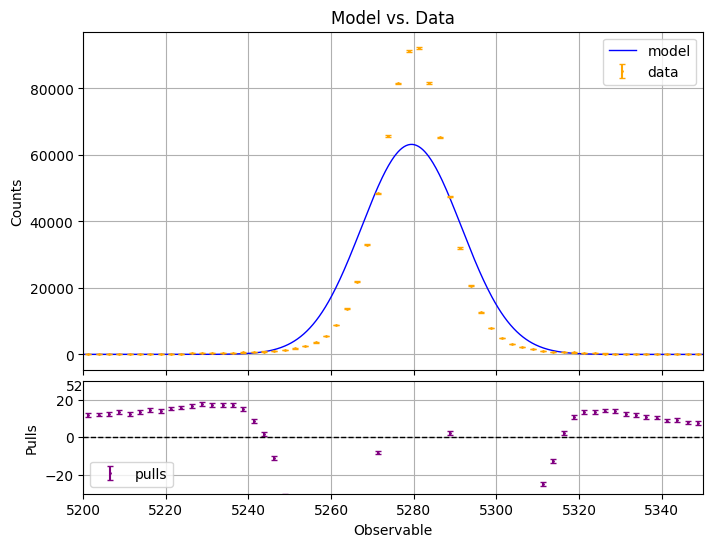

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.physics.CrystalBall'>  params=[alpha_cb, mu_cb, n_cb, sigma_cb]] data=[<zfit.Data: Data obs=('mass',) shape=(765191, 1)>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | opt.) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════╡
│  False  │    True     │      False       │ 2.6e-10 │       2992254.46 |  9992.821 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════╛

Parameters
name        value  (rounded)    at limit
--------  ------------------  ----------
mu_cb                5279.44       False
sigma_cb             12.0797       False
alpha_cb                  23       False
n_cb                      11       False


In [ ]:
#CRYSTALBALL

# Parameters
mu_cb = zfit.Parameter('mu_cb', 5279.4, 5279, 5290)
sigma_cb = zfit.Parameter('sigma_cb', 12.1, 0.1, 15)
alpha_cb = zfit.Parameter('alpha_cb', 23, 0.1, 30)
n_cb = zfit.Parameter('n_cb', 11, 0.1, 20)

# Define the PDF (cb profile)
cb = zfit.pdf.CrystalBall(obs=mass_obs, mu=mu_cb, sigma=sigma_cb, alpha=alpha_cb, n=n_cb)

# Loss function (Unbinned NLL)
nll_cb = zfit.loss.UnbinnedNLL(model=cb, data=simu_data_zfit)

# Minimizer
minimizer_minuit = zfit.minimize.Minuit()
result_cb = minimizer_minuit.minimize(loss=nll_cb)

# Plot result
plot_model_with_pulls(cb, "cb", simu_data_zfit, 5200, 5350, nbins=100)
print(result_cb)

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_3906/2028700416.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


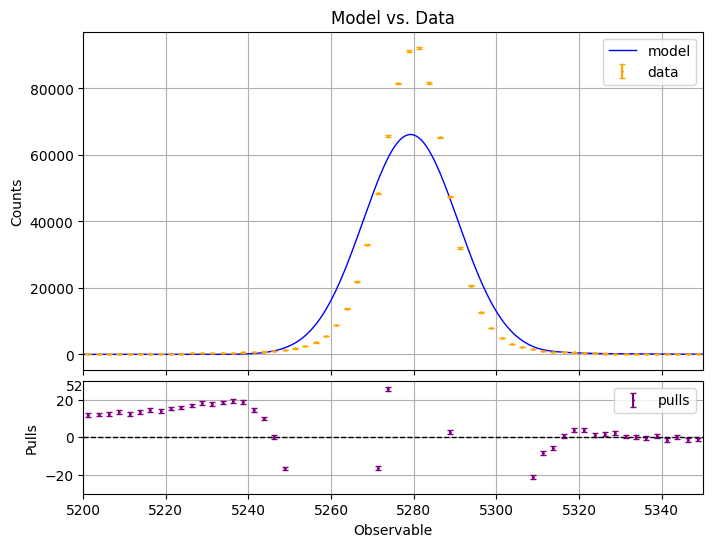

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.physics.DoubleCB'>  params=[alpha_dcb_l, alpha_dcb_r, mu_dcb, n_dcb_l, n_dcb_r, sigma_dcb]] data=[<zfit.Data: Data obs=('mass',) shape=(765191, 1)>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | opt.) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════╡
│  True   │    True     │      False       │ 0.00089 │       2973688.46 |  9025.264 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════╛

Parameters
name           value  (rounded)    at limit
-----------  ------------------  ----------
mu_dcb                  5279.21       False
sigma_dcb               11.4862       False
alpha_dcb_l                  23       False
n_dcb_l                      11       False
alpha_dcb_r             2.63632      

In [ ]:
#DOUBLECRYSTALBALL
# Parameters
mu_dcb = zfit.Parameter('mu_dcb', 5279.4, 5279, 5290)
sigma_dcb = zfit.Parameter('sigma_dcb', 11.1, 0.1, 15)
alpha_dcb_l = zfit.Parameter('alpha_dcb_l', 23., 0.1, 30)
n_dcb_l = zfit.Parameter('n_dcb_l', 11., 0.1, 20)
alpha_dcb_r = zfit.Parameter('alpha_dcb_r', 2.6, 0.1, 30)
n_dcb_r = zfit.Parameter('n_dcb_r', 2., 0.1, 20)
# Define the PDF (dcb profile)
dcb = zfit.pdf.DoubleCB(obs=mass_obs, mu=mu_dcb, sigma=sigma_dcb, alphal=alpha_dcb_l, nl=n_dcb_l, alphar=alpha_dcb_r, nr=n_dcb_r)

# Loss function (Unbinned NLL)
nll_dcb = zfit.loss.UnbinnedNLL(model=dcb, data=simu_data_zfit)

# Minimizer
minimizer_minuit = zfit.minimize.Minuit()
result_dcb = minimizer_minuit.minimize(loss=nll_dcb)

# Plot result
plot_model_with_pulls(dcb, "dcb", simu_data_zfit, 5200, 5350, nbins=100)
print(result_dcb)

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_3906/2028700416.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


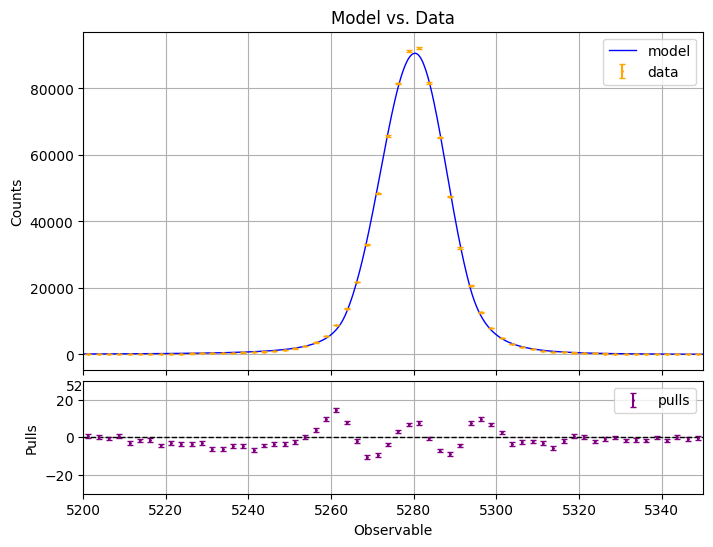

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.physics.GeneralizedCB'>  params=[alpha_gcb_l, alpha_gcb_r, mu_gcb, n_gcb_l, n_gcb_r, sigma_gcb_l, sigma_gcb_r]] data=[<zfit.Data: Data obs=('mass',) shape=(765191, 1)>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | opt.) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════╡
│  True   │    True     │      False       │ 0.00028 │       2840131.49 |  4091.147 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════╛

Parameters
name           value  (rounded)    at limit
-----------  ------------------  ----------
mu_gcb                  5280.29       False
sigma_gcb_l             8.35799       False
alpha_gcb_l             1.99741       False
n_gcb_l                  2.1938       False
sigma_gcb_r      

In [ ]:
#GENERALIZEDCRYSTALLBALL
# Parameters
mu_gcb = zfit.Parameter('mu_gcb', 5279.4, 5279, 5290)
sigma_gcb_l = zfit.Parameter('sigma_gcb_l', 8.4, 0.1, 15)
sigma_gcb_r = zfit.Parameter('sigma_gcb_r', 7.4, 0.1, 15)
alpha_gcb_l = zfit.Parameter('alpha_gcb_l', 2., 0.1, 30)
n_gcb_l = zfit.Parameter('n_gcb_l', 2., 0.1, 20)
alpha_gcb_r = zfit.Parameter('alpha_gcb_r', 1.6, 0.1, 30)
n_gcb_r = zfit.Parameter('n_gcb_r', 4., 0.1, 20)
# Define the PDF (gcb profile)
gcb = zfit.pdf.GeneralizedCB(obs=mass_obs, mu=mu_gcb, sigmal=sigma_gcb_l, sigmar=sigma_gcb_r, alphal=alpha_gcb_l, nl=n_gcb_l, alphar=alpha_gcb_r, nr=n_gcb_r)

# Loss function (Unbinned NLL)
nll_gcb = zfit.loss.UnbinnedNLL(model=gcb, data=simu_data_zfit)

# Minimizer
minimizer_minuit = zfit.minimize.Minuit()
result_gcb = minimizer_minuit.minimize(loss=nll_gcb)

# Plot result
plot_model_with_pulls(gcb, "gcb", simu_data_zfit, 5200, 5350, nbins=100)
print(result_gcb)